<a href="https://colab.research.google.com/github/Rishabh763/Maths-for-Machine-Learning/blob/main/Maths_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1

In [ ]:
import numpy as np
v = np.array([1,-1,2])
w = np.array([2,5,2])

In [ ]:
print(v+w)
print(v-w)

[3 4 4]
[-1 -6  0]


In [ ]:
#scalar mul
print(3*v)

[ 3 -3  6]


In [ ]:
print(np.linalg.norm(v))

2.449489742783178


In [ ]:
s=np.dot(v,w)
print(s)

1


In [ ]:
M = np.array([[1,2],[3,4]])
print(np.linalg.det(M))
print(np.linalg.inv(M))

-2.0000000000000004
[[-2.   1. ]
 [ 1.5 -0.5]]


# Chapter 2

In [ ]:
import numpy as np
A = np.array([[2,-2,3], [1,1,1], [1,3,-1]])
print(A)

[[ 2 -2  3]
 [ 1  1  1]
 [ 1  3 -1]]


In [ ]:
#calculate eignvalue pairs:
values , vectors = np.linalg.eig(A)
print(values,vectors)

[ 3.  1. -2.] [[ 0.57735027  0.57735027 -0.61684937]
 [ 0.57735027 -0.57735027 -0.05607722]
 [ 0.57735027 -0.57735027  0.78508102]]


In [ ]:
A = np.array([[2,-2,3], [0,1,1], [0,0,-1]])
values,vectors = np.linalg.eig(A)
print(values,vectors)

[ 2.  1. -1.] [[ 1.          0.89442719 -0.76626103]
 [ 0.          0.4472136  -0.28734789]
 [ 0.          0.          0.57469577]]


# Chapter 3

In [ ]:
#SVD (Singular value decomposition)
import numpy as np

a = np.array([[1,2,3,4],[1,1,2,3],[0,1,1,0]])
u,s,vh = np.linalg.svd(a,full_matrices=True)
print(u)
print(s)
print(vh)

[[ 0.81094933  0.09338945 -0.57761543]
 [ 0.56996499 -0.34927886  0.74373664]
 [ 0.13229171  0.93235331  0.33647618]]
[6.75094297 1.17344125 0.21864263]
[[ 2.04551323e-01  3.44271217e-01  5.48822541e-01  7.33777830e-01]
 [-2.18067510e-01  6.56064669e-01  4.37997159e-01 -5.74616568e-01]
 [ 7.59784169e-01 -3.43108067e-01  4.16676102e-01 -3.62471925e-01]
 [-5.77350269e-01 -5.77350269e-01  5.77350269e-01  1.11022302e-16]]


In [ ]:
sd = np.diag(s)
sd.shape

(3, 3)

(520, 402)


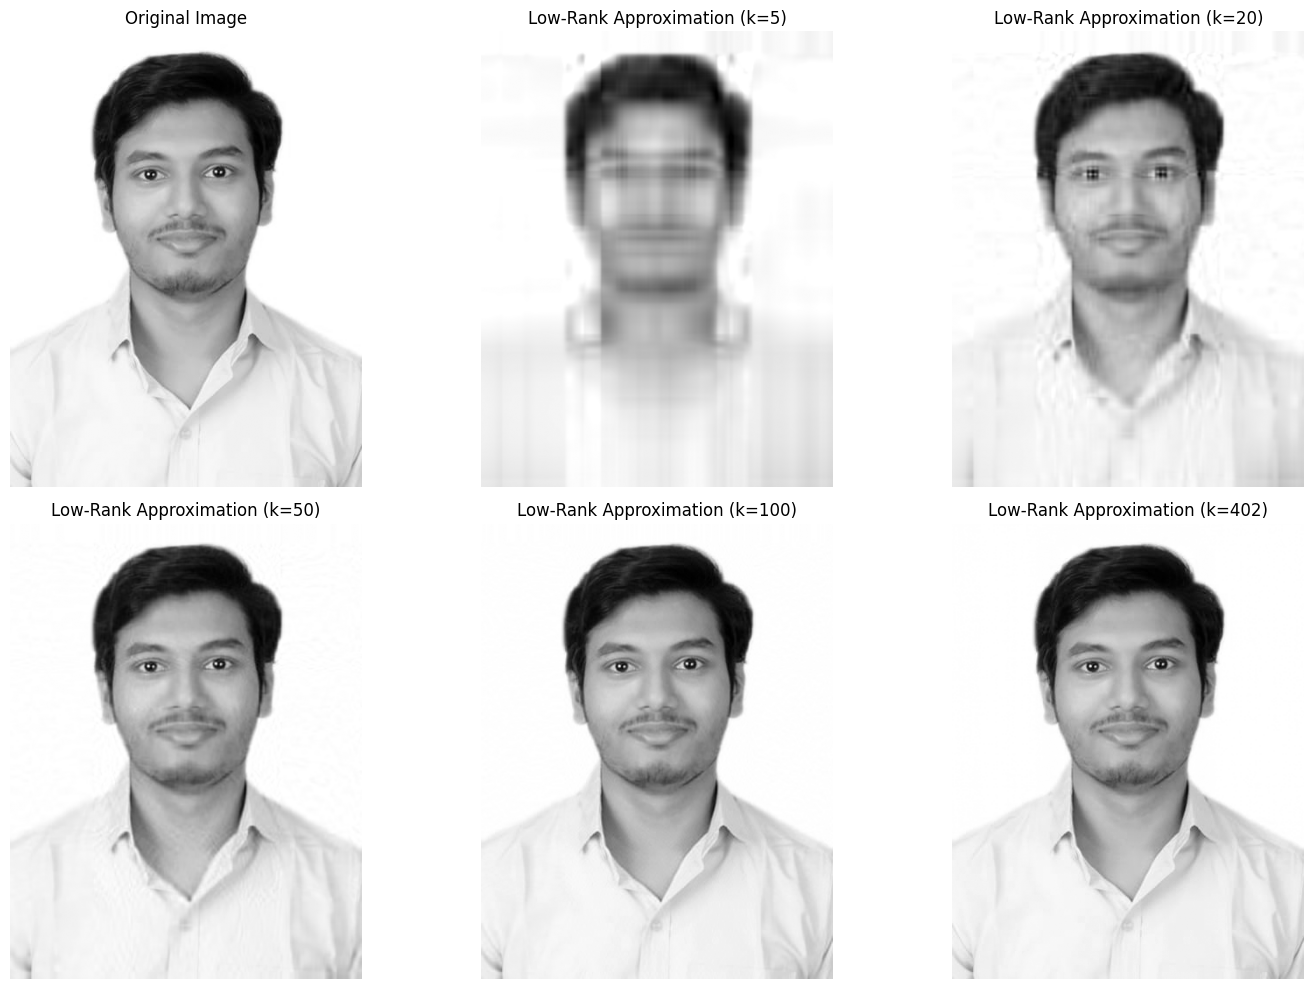

In [ ]:
#svd image low rank approximation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

image_path = "/content/Rishabh_Photo.jpg"
image = cv.imread(image_path)

height, width, _  = image.shape
original_size = height * width


gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
print(gray_image.shape)
U, S, Vt = np.linalg.svd(gray_image, full_matrices=False)

def low_rank_approximation(k):
    approx = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    return np.clip(approx, 0, 255).astype(np.uint8)

k_values = [5, 20, 50, 100, min(gray_image.shape)]

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, k in enumerate(k_values):
    approx_img = low_rank_approximation(k)
    plt.subplot(2, 3, i + 2)
    plt.imshow(approx_img, cmap='gray')
    plt.title(f"Low-Rank Approximation (k={k})")
    plt.axis('off')

plt.tight_layout()
plt.show()

Similarity Score: 97.8151%
Original Image Size: 204.14 KB bytes
Compressed Image Size (k=60): 54.08 KB bytes
Compression Percentage: 73.51%

Optimal k: 60


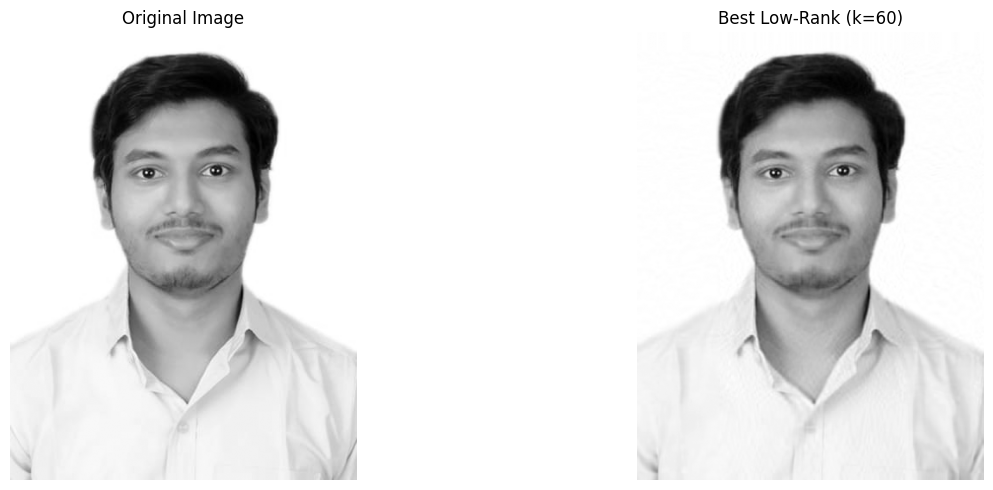

In [ ]:
best_k = 0
previous_ssim = float('-inf')

k_range = list(range(5, min(gray_image.shape), 5))

for k in k_range:
    approx_img = low_rank_approximation(k)

    similarity = ssim(gray_image, approx_img)

    if similarity <= 1.005*previous_ssim:
        best_k = k
        break

    previous_ssim = similarity

def format_size(bytes_size):
    if bytes_size < 1024:
        return f"{bytes_size} bytes"
    elif bytes_size < 1024**2:
        return f"{bytes_size / 1024:.2f} KB"
    elif bytes_size < 1024**3:
        return f"{bytes_size / 1024**2:.2f} MB"
    else:
        return f"{bytes_size / 1024**3:.2f} GB"


def compression_percentage(k):
    compressed_size = k * (height + width + 1)
    compression_ratio = original_size / compressed_size
    compression_percent = (1 - (compressed_size / original_size)) * 100
    return compressed_size, compression_ratio, compression_percent

compressed_size, ratio, percent = compression_percentage(best_k)
similarity = ssim(gray_image, low_rank_approximation(best_k))

print(f"Similarity Score: {similarity*100:.4f}%")
print(f"Original Image Size: {format_size(original_size)} bytes")
print(f"Compressed Image Size (k={best_k}): {format_size(compressed_size)} bytes")
print(f"Compression Percentage: {percent:.2f}%")


print(f"\nOptimal k: {best_k}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

best_approx = low_rank_approximation(best_k)
plt.subplot(1, 2, 2)
plt.imshow(best_approx, cmap='gray')
plt.title(f"Best Low-Rank (k={best_k})")
plt.axis('off')


plt.tight_layout()
plt.show()

# Chapter 4

In [ ]:
#PCA(Principal Component Anaylsis)
#creating a dataset
import numpy as np
x = np.array([[1,3,5,7,9,13,20,20,21,24,26],[5,7,11,14,15,17,18,19,21,22,26]])
x = x.T
print(x)

[[ 1  5]
 [ 3  7]
 [ 5 11]
 [ 7 14]
 [ 9 15]
 [13 17]
 [20 18]
 [20 19]
 [21 21]
 [24 22]
 [26 26]]


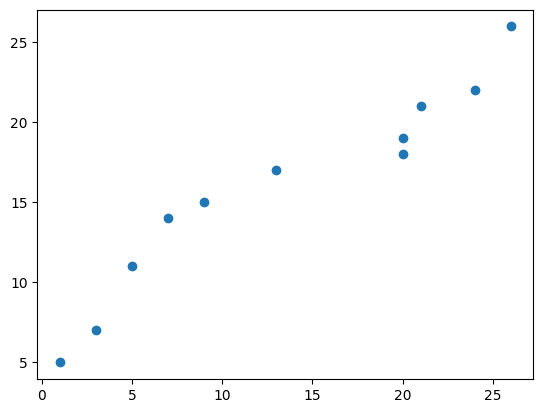

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1])

[[-12.54545455 -10.90909091]
 [-10.54545455  -8.90909091]
 [ -8.54545455  -4.90909091]
 [ -6.54545455  -1.90909091]
 [ -4.54545455  -0.90909091]
 [ -0.54545455   1.09090909]
 [  6.45454545   2.09090909]
 [  6.45454545   3.09090909]
 [  7.45454545   5.09090909]
 [ 10.45454545   6.09090909]
 [ 12.45454545  10.09090909]]


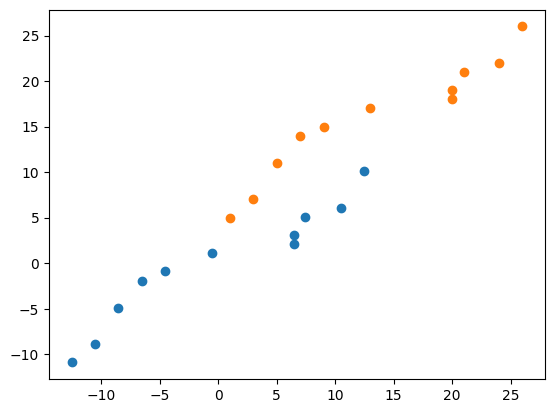

In [ ]:
x_meaned = x - np.mean(x, axis = 0)
print(x_meaned)
plt.figure
plt.scatter(x_meaned[:,0],x_meaned[:,1])
plt.scatter(x[:,0],x[:,1])

In [ ]:
c = np.cov(x_meaned , rowvar= False)
print(c)

[[80.87272727 54.95454545]
 [54.95454545 40.69090909]]


In [ ]:
eval , evect = np.linalg.eig(c)
print(eval,evect)

[119.29375452   2.26988184] [[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


In [ ]:
sorted_index = np.argsort(eval)[::-1]
sorted_eval = eval[sorted_index]
sorted_evec = evect[:,sorted_index]

In [ ]:
n = 1
evec_subset = sorted_evec[:,0:n]
print(evec_subset)

[[0.81956216]
 [0.57299028]]


In [ ]:
X_reduced = np.dot(evec_subset.transpose(),x_meaned.transpose()).transpose()
print(X_reduced)

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(x_meaned)
X_reduced = pca.transform(x_meaned)
print(X_reduced)

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]


In [ ]:
# PCA with Example
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
print(iris.get("feature_names"))
iris.get("target_names")

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)


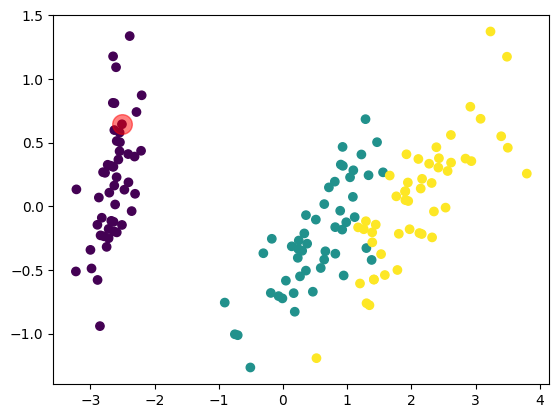

In [ ]:
plt.scatter(X[:, 0],X[:, 1], c=iris.target)
plt.scatter([X[10][0]], [X[10][1]], s=[200], c=["r"], alpha=0.5)

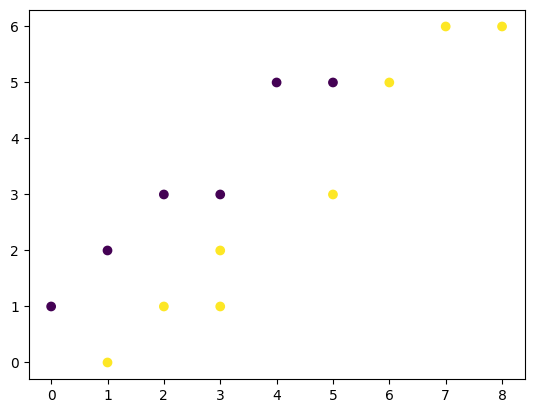

In [ ]:
# LDA(Linear Discriminant Analysis)
# define the dataset
import numpy as np
import matplotlib.pyplot as plt
x = np.array([[0, 1, 2, 3, 4, 5, 1, 2, 3, 3, 5, 6, 7, 8],[1, 2, 3, 3, 5, 5, 0, 1, 1, 2, 3, 5, 6, 6]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
x = x.T
plt.scatter(x[:,0],x[:,1], c = y)

In [ ]:
# Apply for PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(x)
X = pca.transform(x)
print(X)

[[-4.07140709]
 [-2.6633141 ]
 [-1.25522111]
 [-0.48545908]
 [ 1.56096488]
 [ 2.3307269 ]
 [-3.93997604]
 [-2.53188305]
 [-1.76212102]
 [-1.12379005]
 [ 1.05406496]
 [ 3.10048893]
 [ 4.50858192]
 [ 5.27834394]]


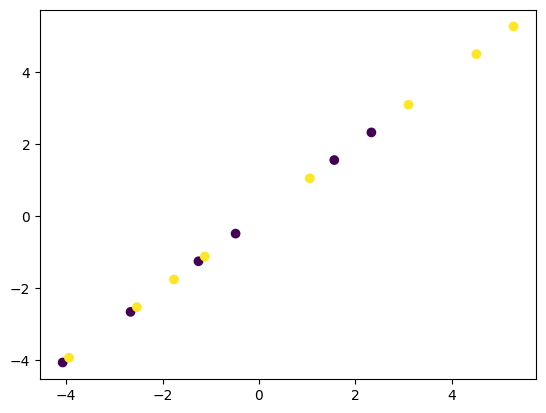

In [ ]:
plt.scatter(X[:, 0], X[:,0], c=y)

In [ ]:
# Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(x, y)
X = lda.transform(x)
print(X)

[[-2.73733275]
 [-2.84638529]
 [-2.95543783]
 [-0.97995297]
 [-3.17354291]
 [-1.19805805]
 [ 1.32268952]
 [ 1.21363698]
 [ 3.18912185]
 [ 1.10458444]
 [ 2.97101677]
 [ 0.77742682]
 [ 0.66837428]
 [ 2.64385915]]


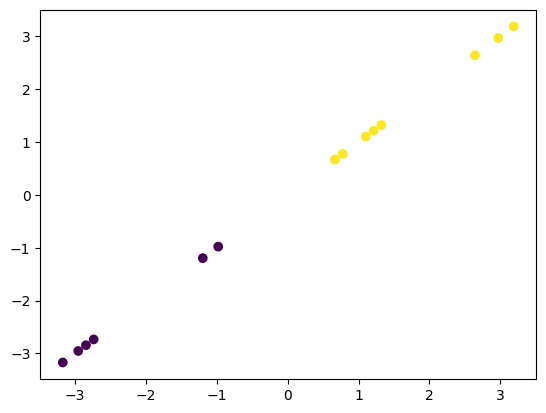

In [ ]:
plt.scatter(X[:, 0], X[:,0], c=y)

In [ ]:
# Mini Project
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
wine = load_wine()
x = np.array(wine.data)
y = np.array(wine.target)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
X_pca = pca.transform(x)
print(X_pca)

[[ 3.18562979e+02  2.14921307e+01]
 [ 3.03097420e+02 -5.36471768e+00]
 [ 4.38061133e+02 -6.53730945e+00]
 [ 7.33240139e+02  1.92729032e-01]
 [-1.15714285e+01  1.84899946e+01]
 [ 7.03231192e+02 -3.32158674e-01]
 [ 5.42971581e+02 -1.35189666e+01]
 [ 5.48401860e+02  1.14494324e+01]
 [ 2.98036863e+02 -8.18015784e+00]
 [ 2.98049553e+02 -7.10154294e+00]
 [ 7.63079712e+02 -8.33431723e+00]
 [ 5.32943228e+02 -1.42876338e+01]
 [ 5.72834410e+02 -2.10050143e+01]
 [ 4.02925358e+02 -1.61026352e+01]
 [ 8.00053394e+02 -1.21184472e+01]
 [ 5.63245578e+02  2.21482866e+00]
 [ 5.33379651e+02  1.08048022e+01]
 [ 3.83317591e+02  8.47741982e+00]
 [ 9.33118387e+02 -8.35447844e+00]
 [ 9.84031775e+01  1.43926594e+01]
 [ 3.35935940e+01  2.55679565e+01]
 [ 2.31464375e+01  1.81747309e+00]
 [ 2.88093030e+02 -3.96304175e+00]
 [ 2.67981513e+02 -9.57070401e+00]
 [ 9.80198858e+01 -5.49584606e+00]
 [ 8.34987440e+01  2.28916215e+01]
 [ 4.47925596e+02 -1.47973313e+01]
 [ 5.37919165e+02 -1.53883461e+01]
 [ 1.68210468e+02  4

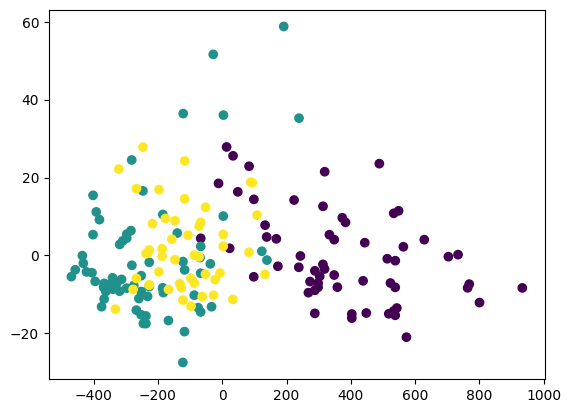

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:,1], c=y)

In [ ]:
# Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x, y)
X_lda = lda.transform(x)
print(X_lda)

[[-4.70024401  1.97913835]
 [-4.30195811  1.17041286]
 [-3.42071952  1.42910139]
 [-4.20575366  4.00287148]
 [-1.50998168  0.4512239 ]
 [-4.51868934  3.21313756]
 [-4.52737794  3.26912179]
 [-4.14834781  3.10411765]
 [-3.86082876  1.95338263]
 [-3.36662444  1.67864327]
 [-4.80587907  2.23536271]
 [-3.42807646  2.17510939]
 [-3.66610246  2.26248961]
 [-5.58824635  2.05478773]
 [-5.50131449  3.61304865]
 [-3.18475189  2.88952528]
 [-3.28936988  2.76584266]
 [-2.99809262  1.42511132]
 [-5.24640372  3.70982655]
 [-3.13653106  1.97689922]
 [-3.57747791  0.5624599 ]
 [-1.69077135  0.91342136]
 [-4.83515033  0.9147628 ]
 [-3.09588961  0.61735888]
 [-3.32164716  0.29847734]
 [-2.14482223  0.16369247]
 [-3.9824285   2.17515679]
 [-2.68591432  1.21850924]
 [-3.56309464  1.03817651]
 [-3.17301573  1.37789624]
 [-2.99626797  1.32419896]
 [-3.56866244  2.34065478]
 [-3.38506383  0.20123426]
 [-3.5275375   1.71592739]
 [-2.85190852  1.47070771]
 [-2.79411996  0.23793093]
 [-2.75808511  1.56970421]
 

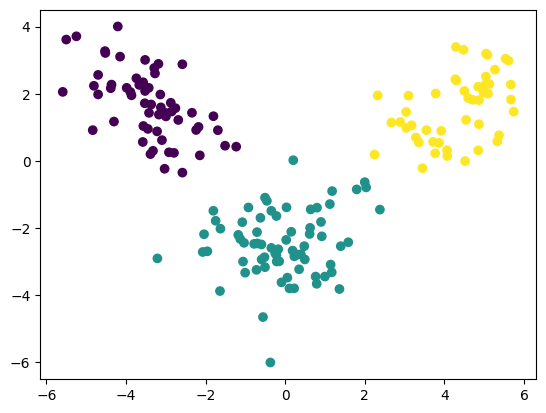

In [ ]:
plt.scatter(X_lda[:, 0], X_lda[:,1], c=y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [ ]:
yn = lda.predict(X_test)
print(y_test)
print(yn)
print(y_test - yn)

[2 0 0 2 1 1 1 1 1 1 2 0 2 2 0 2 2 2 1 1 2 0 1 0 1 1 0 0 1 0 1 0 2 1 0 1 1
 2 0 0 0 0 0 0 0 2 0 2 2 2 1 1 1 0]
[2 0 0 2 1 1 1 1 1 1 2 0 2 2 0 2 2 2 1 1 2 0 1 0 1 1 0 0 1 0 1 0 2 1 0 1 1
 2 0 0 0 0 0 0 0 2 0 2 2 2 1 1 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Chapter 5

In [ ]:
# Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Chapter 6

# Chapter 7

In [ ]:
#sympy (library to do calculus with python)
import sympy as sym

x=sym.symbols('x')
derivative1 =  sym.diff(sym.sin(x),x)
print(derivative1)



cos(x)


In [ ]:
import sympy as sym

x=sym.symbols('x')
derivative1 =  sym.diff(sym.sin(x**2),x)
print(derivative1)

2*x*cos(x**2)


In [ ]:
import sympy as sym

x=sym.symbols('x')
func = sym.sin(x)**2 + sym.exp(x**2)
derivative1 =  sym.diff(func,x)
print(derivative1)

2*x*exp(x**2) + 2*sin(x)*cos(x)


In [ ]:
import sympy as sym
# sym.diff(func , var, n)

x=sym.symbols('x')
func = sym.sin(x)**2 + sym.exp(x**2)
derivative1 =  sym.diff(func,x,2)
print(derivative1)

2*(2*x**2*exp(x**2) + exp(x**2) - sin(x)**2 + cos(x)**2)


In [ ]:
import sympy as sym

x,y,z=sym.symbols('x,y,z')
func = x**3*y + y**2 + z**3
derivative1_x =  sym.diff(func,x)
print(derivative1_x)

3*x**2*y


In [ ]:
import sympy as sym

x,y,z=sym.symbols('x,y,z')
func = x**3*y + y**2 + z**3
derivative1_y =  sym.diff(func,y)
print(derivative1_y)

x**3 + 2*y


In [ ]:
import sympy as sym

x,y,z=sym.symbols('x,y,z')
func = x**3*y + y**2 + z**3
derivative2_x =  sym.diff(func,x,2)
print(derivative2_x)

6*x*y


In [ ]:
import sympy as sym

x,y,z=sym.symbols('x,y,z')
func = x**3*y + y**2 + z**3
derivative2_xy =  sym.diff(func,x,y)
print(derivative2_xy)

3*x**2


In [ ]:
# sym.integrate(func , var)
# sym.integrate(func, (var, lower_limit, upper_limit))
import sympy as sym
x = sym.symbols('x')
integ = sym.integrate(sym.sin(x),x)
print(integ)

-cos(x)


In [ ]:
import sympy as sym
x = sym.symbols('x')
integ = sym.integrate(sym.sin(x),(x,0,1))
print(integ)

1 - cos(1)


In [ ]:
import sympy as sym
x = sym.symbols('x')
integ = sym.integrate(sym.exp(-x),(x,0,sym.oo))
print(integ)

1


In [ ]:
#double integral
import sympy as sym
x, y = sym.symbols('x , y')
integ = sym.integrate(sym.exp(-x**2-y**2),(x,-sym.oo,sym.oo),(y,-sym.oo,sym.oo))
print(integ)

pi


In [ ]:
import sympy as sym
x = sym.symbols('x')
integ = sym.integrate(sym.exp(-x),(x,0,sym.pi))
print(integ)

1 - exp(-pi)


In [ ]:
#limits
import sympy as sym
x = sym.symbols('x')
limit1 = sym.limit(sym.exp(-x),x,0)
print(limit1)

1


In [ ]:
import sympy as sym
x = sym.symbols('x')
limit1 = sym.limit(sym.exp(-x)/x,x,sym.oo)
print(limit1)

0


In [ ]:
#series expansion
#sym.series(function,var,start,order)

import sympy as sym
x = sym.symbols('x')
series = sym.series(sym.cos(x),x)
print(series)

1 - x**2/2 + x**4/24 + O(x**6)


In [ ]:
import sympy as sym
x = sym.symbols('x')
series = sym.series(sym.cos(x)**2,x,1,4)
print(series)

cos(1)**2 - 2*(x - 1)*sin(1)*cos(1) + (-1 + sin(1)**2/cos(1)**2)*(x - 1)**2*cos(1)**2 + 4*(x - 1)**3*sin(1)*cos(1)/3 + O((x - 1)**4, (x, 1))


#Chapter 10

In [ ]:
# CVXopt

#Linear Programming Problem
from cvxopt import matrix, solvers
A = matrix([[-1.0,2.0,-1.0,0.0],[-1.0,3.0,0.0,-1.0]])
# print(A)
# A.size

B = matrix([-2.0,12.0,0.0,0.0])

C = matrix([2.0,3.0])

sol = solvers.lp(C,A,B, options={'maxiters':3})
print(sol['x'])

     pcost       dcost       gap    pres   dres   k/t
 0:  1.0471e+01 -7.7647e+00  1e+01  0e+00  5e-01  1e+00
 1:  8.4116e+00  2.4976e+00  5e+00  2e-16  2e-01  5e-01
 2:  4.5406e+00  3.5762e+00  9e-01  3e-17  3e-02  2e-01
 3:  4.0080e+00  3.9869e+00  2e-02  3e-17  7e-04  5e-03
Terminated (maximum number of iterations reached).
[ 2.00e+00]
[ 5.38e-03]



In [ ]:
# Quadratic Programming Problem
from cvxopt import matrix,solvers
p = matrix([[2.0,1.0],[1.0,4.0]])
q = matrix([3.0,4.0])
G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0.0,0.0])

A = matrix([[2.0],[1.0]])
b = matrix([1.0])

sol = solvers.qp(p,q,G,h,A,b,options = {'maxiters':5})
print(sol['x'])


     pcost       dcost       gap    pres   dres
 0:  9.5845e-01  1.2687e+00  4e+00  2e+00  5e-01
 1:  1.5738e+00  1.4440e+00  4e-01  1e-01  3e-02
 2:  1.7511e+00  1.7379e+00  1e-02  1e-16  3e-16
 3:  1.7500e+00  1.7499e+00  1e-04  1e-16  1e-16
 4:  1.7500e+00  1.7500e+00  1e-06  6e-17  9e-17
Optimal solution found.
[ 5.00e-01]
[ 4.28e-08]



In [ ]:
#support vector machine
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


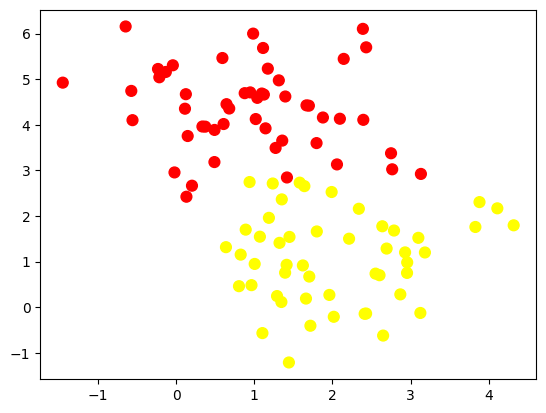

In [ ]:
#Generating Binary Classification Data:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.95)
plt.scatter(x[:, 0], x[:, 1], c=y, s=60, cmap='autumn');

(-1.0, 3.5)

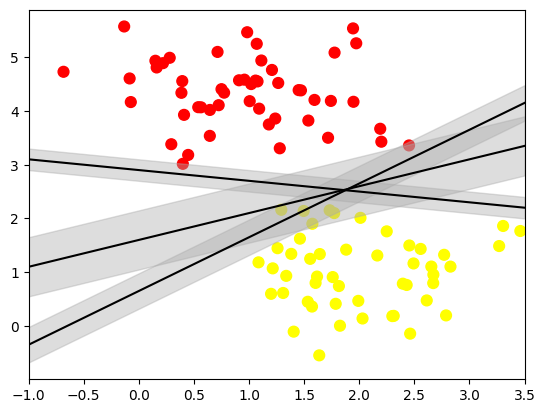

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=60, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [ ]:
# lets create model from SVM model with some data
from sklearn.svm import SVC
model = SVC(kernel='linear',C=.1)
model.fit(x, y)

SVC(C=0.1, kernel='linear')

In [ ]:
#ploting
def plot_svc_decision_function(model, ax=None, plot_support=True):
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  ax.contour(X, Y, P, colors='k',
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
              model.support_vectors_[:, 1],
              s=300, linewidth=1, facecolors='none');
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

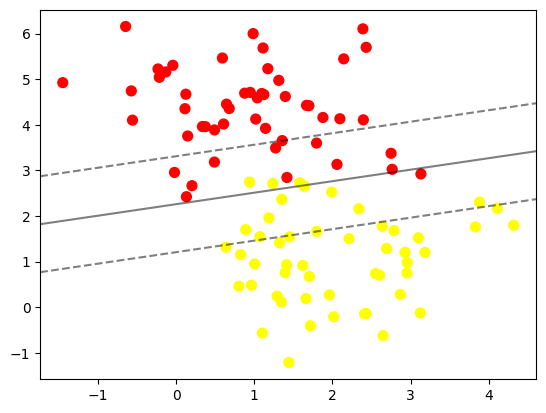

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [ ]:
model.support_vectors_

array([[0.39920934, 3.01626962],
       [2.45161058, 3.35844964],
       [1.29273731, 2.16101743]])

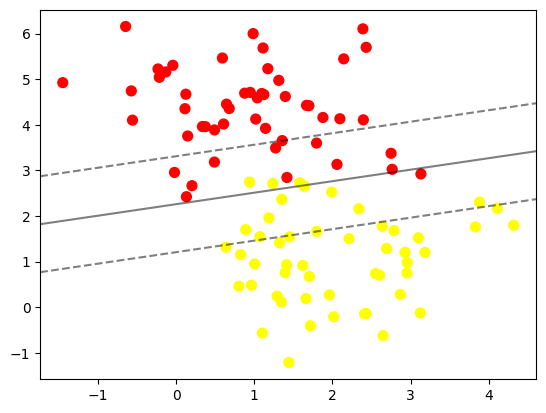

In [ ]:
#Non-linear SVM
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.95)
clf = SVC(kernel='linear',C=.1)
clf.fit(X, y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)